In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [31]:
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
# Load datos
path_datos = os.path.join('Datos','Originales')
filename = os.path.join(path_datos,'cancellation_data.csv')
df = pd.read_csv(filename)
df['is_cancelled'] = df['status'] == 'cancelled'
#print(df.head())

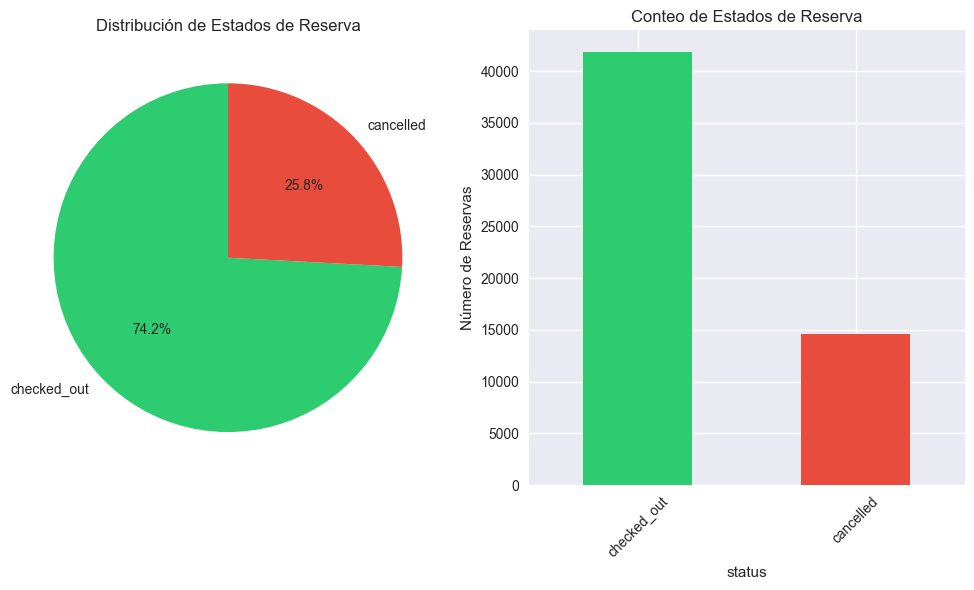

In [32]:
# Gráfico 1: Distribución de status
plt.figure(figsize=(10, 6))

status_counts = df['status'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Verde para checked_out, rojo para cancelled

plt.subplot(1, 2, 1)
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Distribución de Estados de Reserva')

plt.subplot(1, 2, 2)
status_counts.plot(kind='bar', color=colors)
plt.title('Conteo de Estados de Reserva')
plt.ylabel('Número de Reservas')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

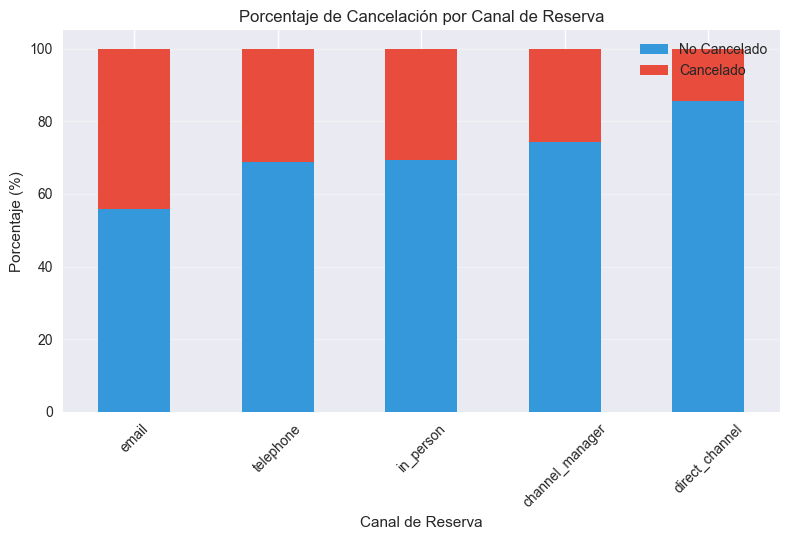


Tasas de cancelación por canal:
origin
email              44.039849
telephone          31.092727
in_person          30.769231
channel_manager    25.717027
direct_channel     14.312506
Name: True, dtype: float64


In [33]:
# Gráfico 2: Cancelación por canal
plt.figure(figsize=(12, 6))
cancel_by_origin = pd.crosstab(df['origin'], df['is_cancelled'], normalize='index') * 100

cancel_by_origin_sorted = cancel_by_origin.sort_values(by=True, ascending=False)
cancel_by_origin_sorted.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])

plt.title('Porcentaje de Cancelación por Canal de Reserva')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Canal de Reserva')
plt.legend(['No Cancelado', 'Cancelado'], loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar tasas específicas
print("\nTasas de cancelación por canal:")
print(cancel_by_origin[True].sort_values(ascending=False))

<Figure size 1200x600 with 0 Axes>

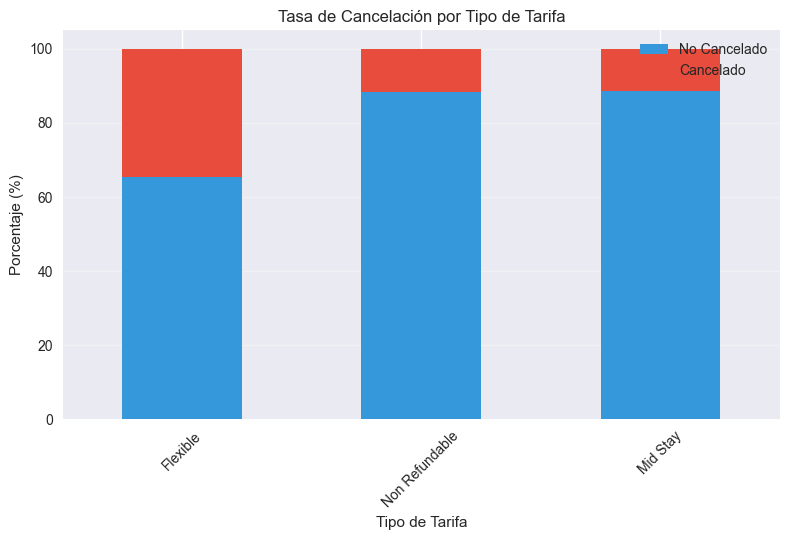

In [34]:
# Gráfico 3: Cancelación por tipo de tarifa
plt.figure(figsize=(12, 6))

cancel_by_rate = pd.crosstab(df['rate_type'], df['is_cancelled'], normalize='index') * 100
cancel_by_rate_sorted = cancel_by_rate.sort_values(by=True, ascending=False)

cancel_by_rate_sorted.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])
plt.title('Tasa de Cancelación por Tipo de Tarifa')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Tipo de Tarifa')
plt.legend(['No Cancelado', 'Cancelado'])
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

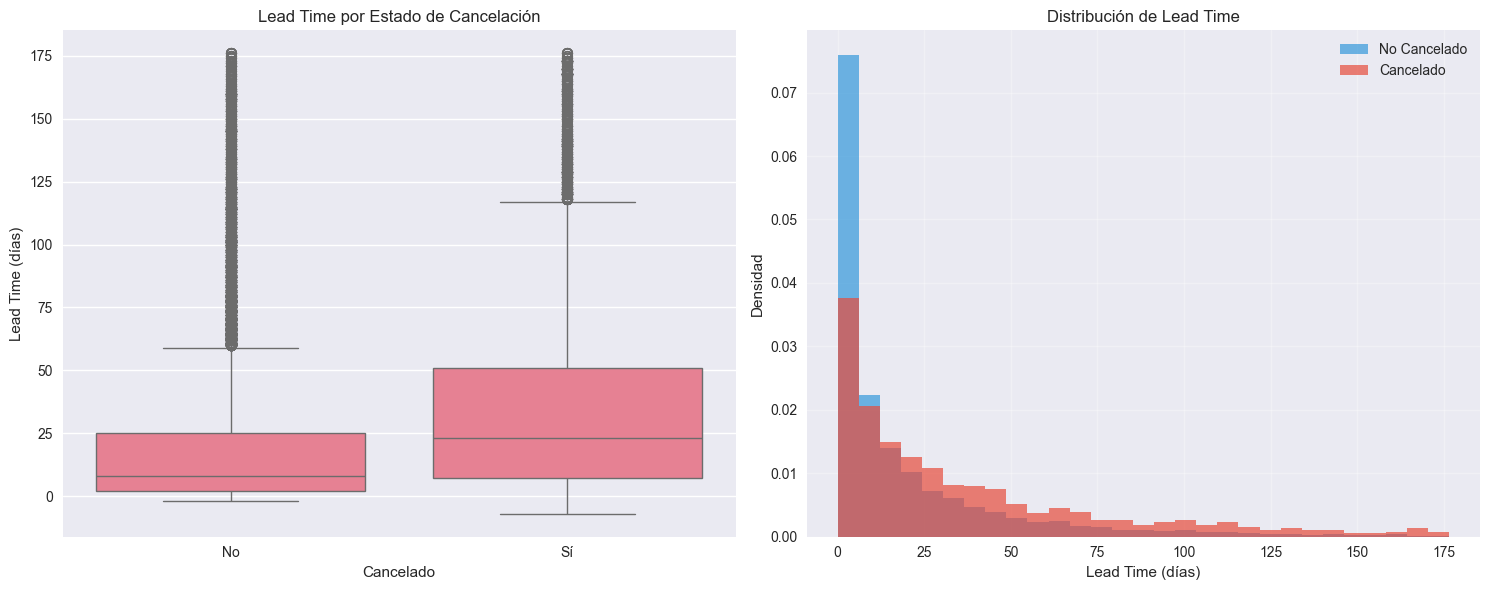

Lead time promedio - No cancelados: 27.5 días
Lead time promedio - Cancelados: 60.4 días


In [35]:
# Gráfico 4: Lead Time vs Cancelación
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Boxplot
df_box = df[df['lead_time'] <= df['lead_time'].quantile(0.95)]  # Remover outliers extremos
sns.boxplot(x='is_cancelled', y='lead_time', data=df_box)
plt.title('Lead Time por Estado de Cancelación')
plt.xlabel('Cancelado')
plt.ylabel('Lead Time (días)')
plt.xticks([0, 1], ['No', 'Sí'])

plt.subplot(1, 2, 2)
# Histograma comparativo
max_lead = min(df['lead_time'].quantile(0.95), 200)  # Limitar para mejor visualización
bins = np.linspace(0, max_lead, 30)

plt.hist(df[df['is_cancelled'] == False]['lead_time'], bins=bins, alpha=0.7, 
         label='No Cancelado', color='#3498db', density=True)
plt.hist(df[df['is_cancelled'] == True]['lead_time'], bins=bins, alpha=0.7, 
         label='Cancelado', color='#e74c3c', density=True)
plt.xlabel('Lead Time (días)')
plt.ylabel('Densidad')
plt.legend()
plt.title('Distribución de Lead Time')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estadísticas
print(f"Lead time promedio - No cancelados: {df[df['is_cancelled'] == False]['lead_time'].mean():.1f} días")
print(f"Lead time promedio - Cancelados: {df[df['is_cancelled'] == True]['lead_time'].mean():.1f} días")

C:\Users\Umiak\AppData\Local\Temp\ipykernel_11032\4271756240.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stay_cancel_rate = df.groupby(stay_bins)['is_cancelled'].mean() * 100


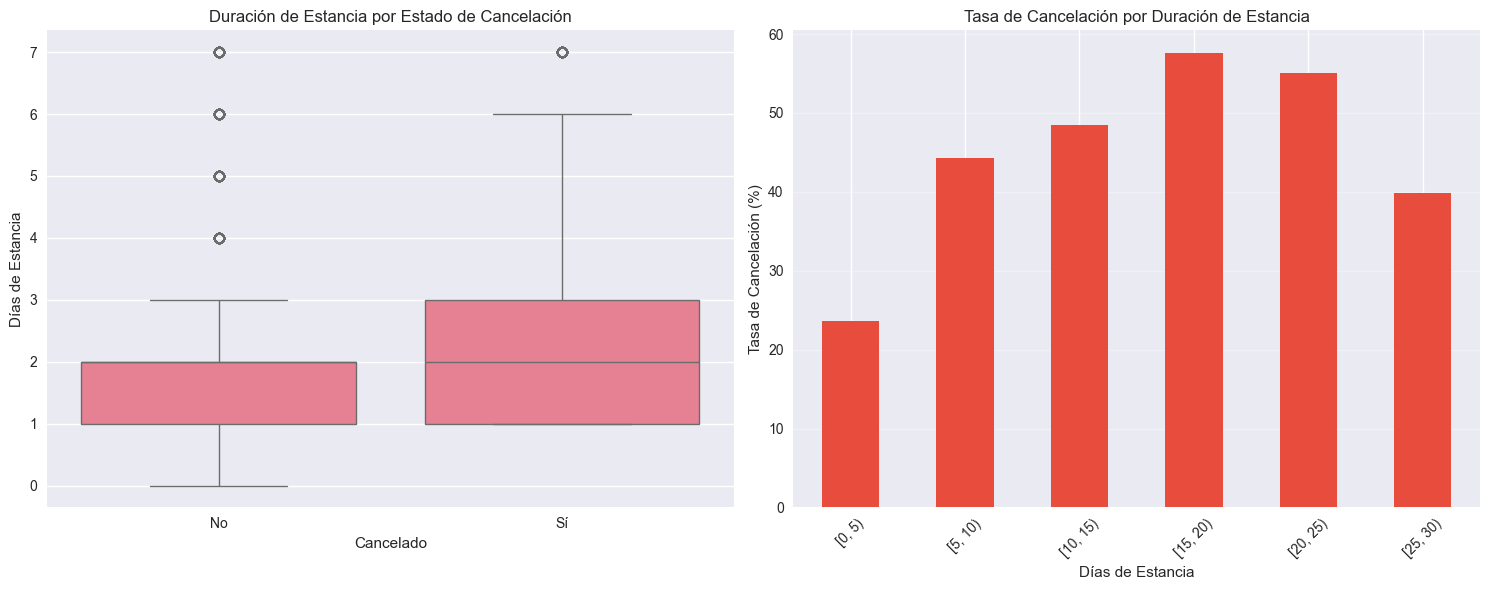

In [36]:
# Gráfico 5: Duración de estancia vs cancelación
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
# Boxplot (limitando outliers)
df_stay = df[df['lenght_of_stay'] <= df['lenght_of_stay'].quantile(0.95)]
sns.boxplot(x='is_cancelled', y='lenght_of_stay', data=df_stay)
plt.title('Duración de Estancia por Estado de Cancelación')
plt.xlabel('Cancelado')
plt.ylabel('Días de Estancia')
plt.xticks([0, 1], ['No', 'Sí'])

plt.subplot(1, 2, 2)
# Tasa de cancelación por duración
stay_bins = pd.cut(df['lenght_of_stay'], bins=range(0, 31, 5), right=False)
stay_cancel_rate = df.groupby(stay_bins)['is_cancelled'].mean() * 100

stay_cancel_rate.plot(kind='bar', color='#e74c3c')
plt.title('Tasa de Cancelación por Duración de Estancia')
plt.xlabel('Días de Estancia')
plt.ylabel('Tasa de Cancelación (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

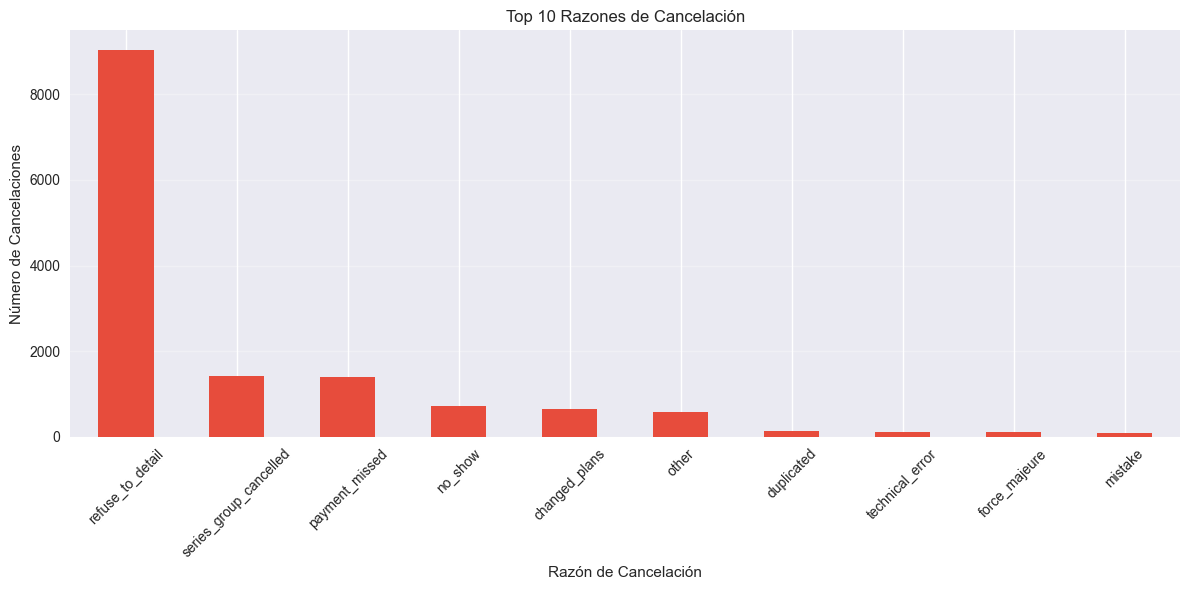

Razón más común: refuse_to_detail (9040 cancelaciones)


In [37]:
# Gráfico 6: Razones de cancelación (solo cancelados)
cancelled_df = df[df['is_cancelled'] == True]

plt.figure(figsize=(12, 6))
reason_counts = cancelled_df['cancellation_reason'].value_counts()

# Si hay muchos valores, mostramos solo los top N
if len(reason_counts) > 10:
    top_reasons = reason_counts.head(10)
    top_reasons.plot(kind='bar', color='#e74c3c')
    plt.title('Top 10 Razones de Cancelación')
else:
    reason_counts.plot(kind='bar', color='#e74c3c')
    plt.title('Razones de Cancelación')

plt.ylabel('Número de Cancelaciones')
plt.xlabel('Razón de Cancelación')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Razón más común: {reason_counts.index[0]} ({reason_counts.iloc[0]} cancelaciones)")

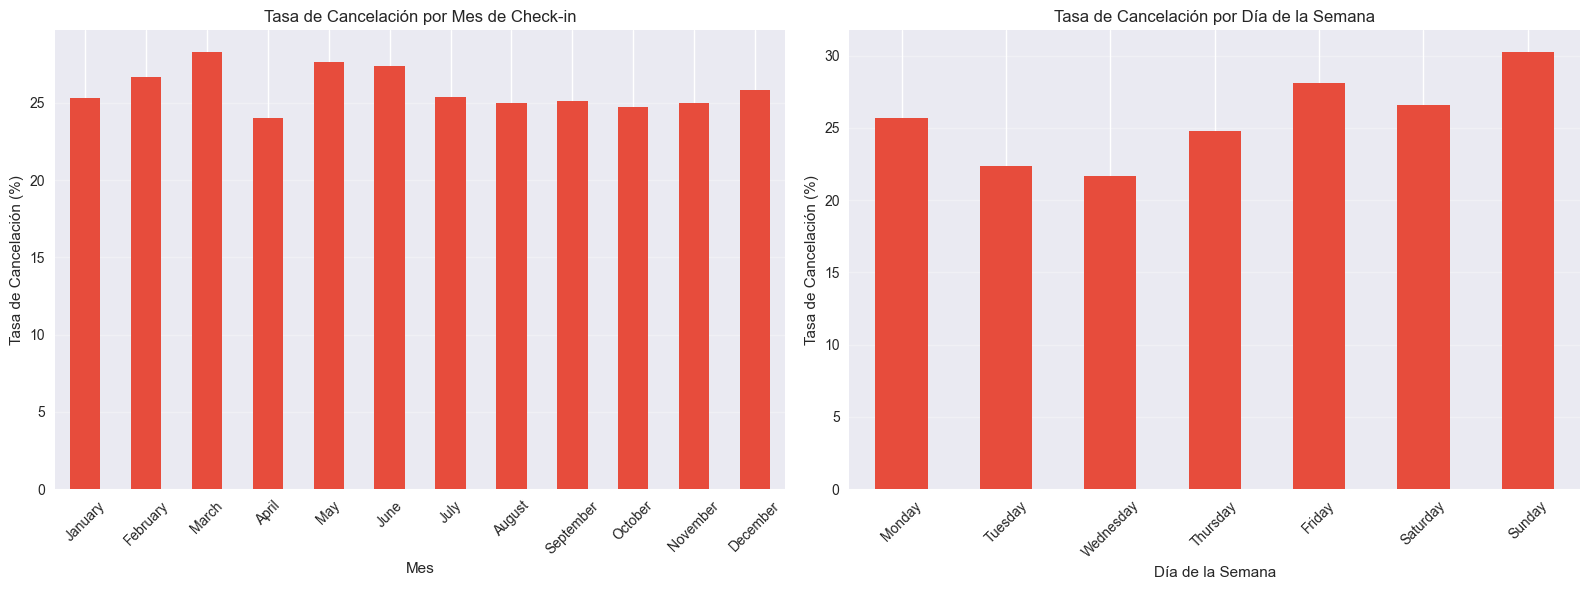

In [38]:
# Gráfico 7: Cancelación por mes y día
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Por mes
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
month_cancel = pd.crosstab(df['checkin_month'], df['is_cancelled'], normalize='index') * 100
month_cancel = month_cancel.reindex([m for m in month_order if m in month_cancel.index])

month_cancel[True].plot(kind='bar', ax=ax1, color='#e74c3c')
ax1.set_title('Tasa de Cancelación por Mes de Check-in')
ax1.set_ylabel('Tasa de Cancelación (%)')
ax1.set_xlabel('Mes')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Por día de la semana
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_cancel = pd.crosstab(df['checkin_day'], df['is_cancelled'], normalize='index') * 100
day_cancel = day_cancel.reindex([d for d in day_order if d in day_cancel.index])

day_cancel[True].plot(kind='bar', ax=ax2, color='#e74c3c')
ax2.set_title('Tasa de Cancelación por Día de la Semana')
ax2.set_ylabel('Tasa de Cancelación (%)')
ax2.set_xlabel('Día de la Semana')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

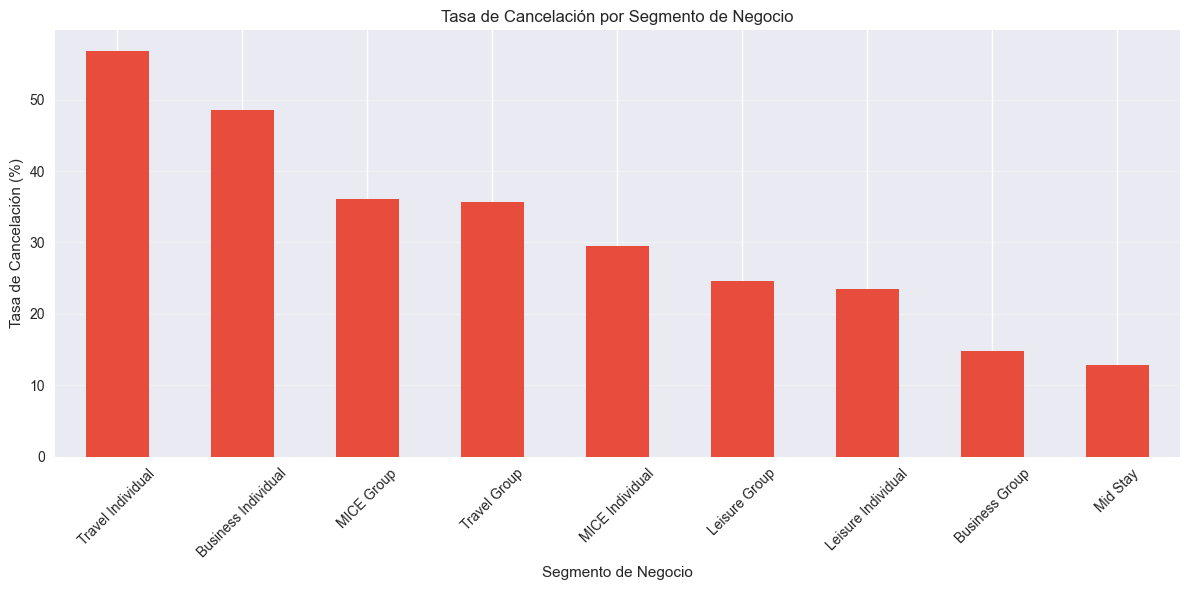

In [40]:
# Gráfico 8: Cancelación por segmento de negocio
plt.figure(figsize=(12, 6))

business_cancel = pd.crosstab(df['business_segment'], df['is_cancelled'], normalize='index') * 100
business_cancel_sorted = business_cancel.sort_values(by=True, ascending=False)

business_cancel_sorted[True].plot(kind='bar', color='#e74c3c')
plt.title('Tasa de Cancelación por Segmento de Negocio')
plt.ylabel('Tasa de Cancelación (%)')
plt.xlabel('Segmento de Negocio')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

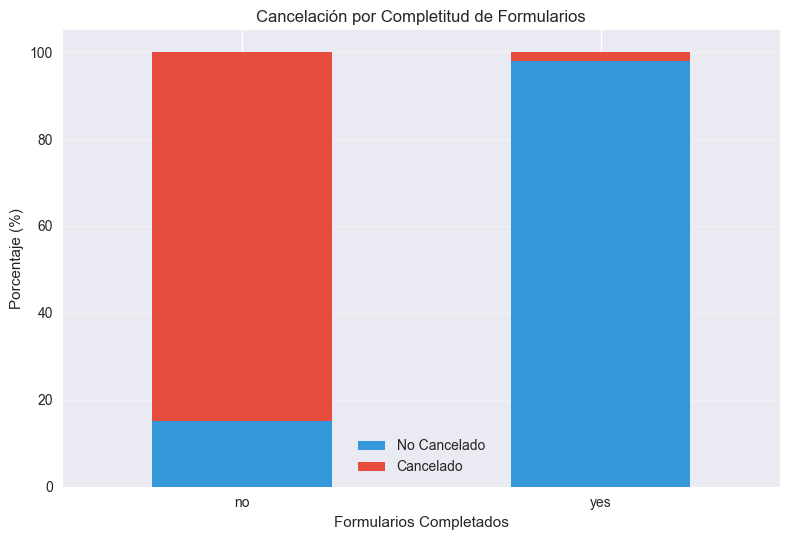

Diferencia en tasa de cancelación (Sí vs No formularios): -82.8%


In [41]:
# Gráfico 9: Formularios completados vs cancelación
plt.figure(figsize=(12, 6))

forms_cancel = pd.crosstab(df['all_entry_forms_completed'], df['is_cancelled'], normalize='index') * 100

forms_cancel.plot(kind='bar', stacked=True, color=['#3498db', '#e74c3c'])
plt.title('Cancelación por Completitud de Formularios')
plt.ylabel('Porcentaje (%)')
plt.xlabel('Formularios Completados')
plt.legend(['No Cancelado', 'Cancelado'])
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Mostrar diferencia
if 'yes' in forms_cancel.index and 'no' in forms_cancel.index:
    diff = forms_cancel.loc['yes', True] - forms_cancel.loc['no', True]
    print(f"Diferencia en tasa de cancelación (Sí vs No formularios): {diff:.1f}%")

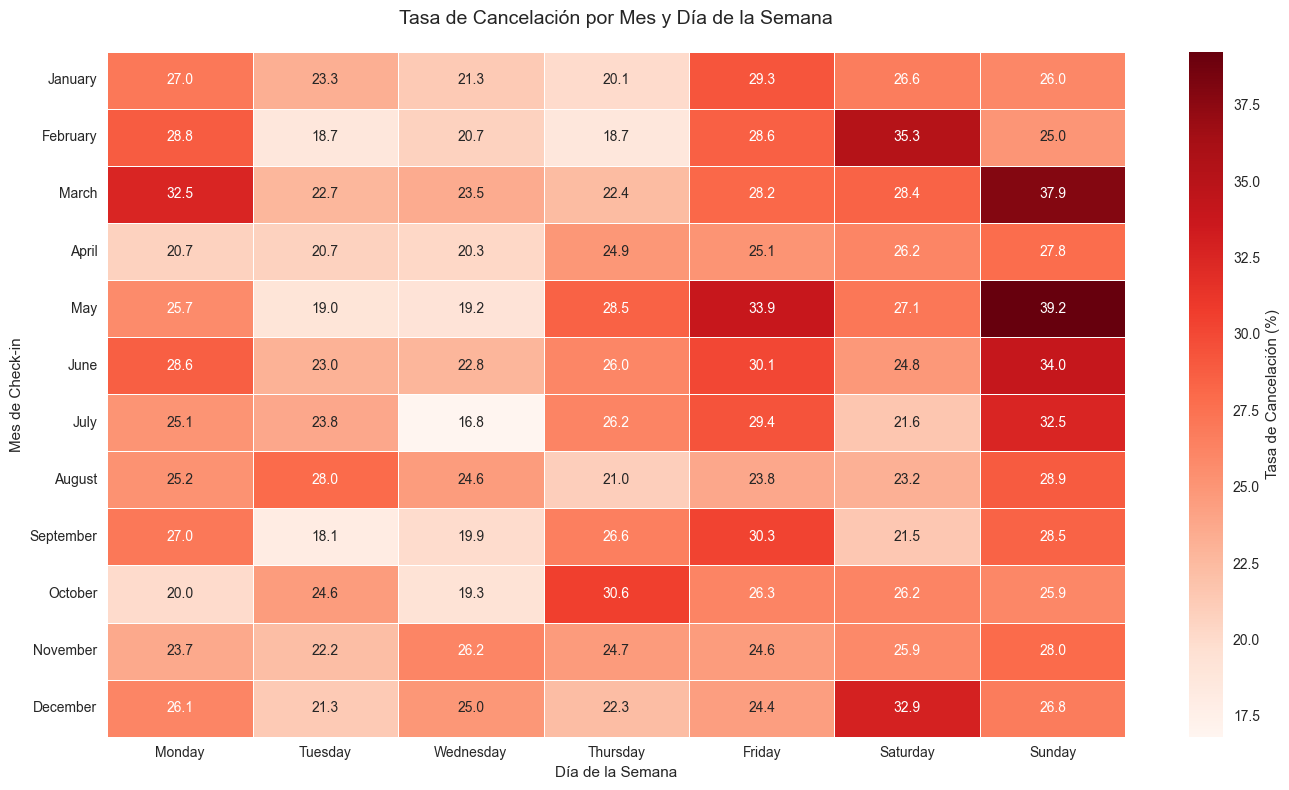

In [42]:
# 10. Heatmap Cancelación por mes y día
plt.figure(figsize=(14, 8))

# Preparar datos para heatmap
heatmap_data = df.groupby(['checkin_month', 'checkin_day'])['is_cancelled'].mean().unstack() * 100

# Ordenar meses y días
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
              'July', 'August', 'September', 'October', 'November', 'December']
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Reindexar con los meses/días disponibles
available_months = [m for m in month_order if m in heatmap_data.index]
available_days = [d for d in day_order if d in heatmap_data.columns]

heatmap_data = heatmap_data.reindex(index=available_months, columns=available_days)

sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='Reds', 
            cbar_kws={'label': 'Tasa de Cancelación (%)'},
            linewidths=0.5)
plt.title('Tasa de Cancelación por Mes y Día de la Semana', fontsize=14, pad=20)
plt.xlabel('Día de la Semana')
plt.ylabel('Mes de Check-in')
plt.tight_layout()
plt.show()

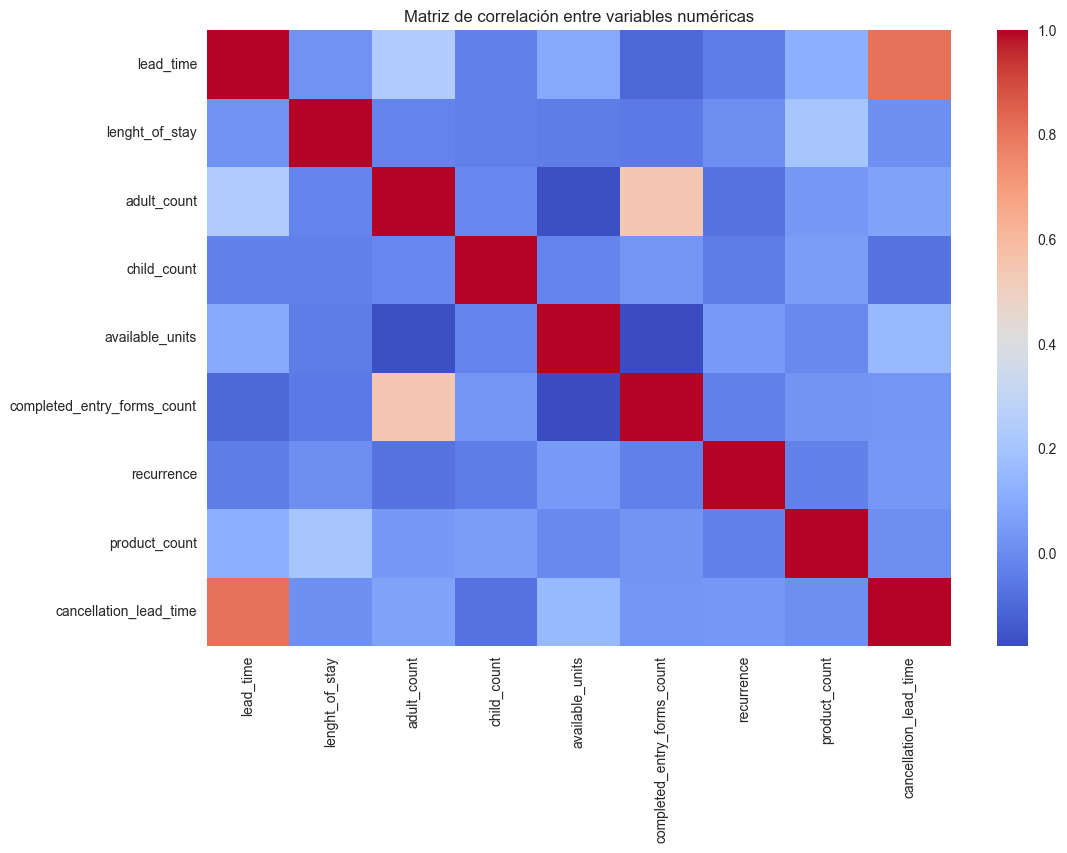

In [44]:
#Matriz de correlación
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

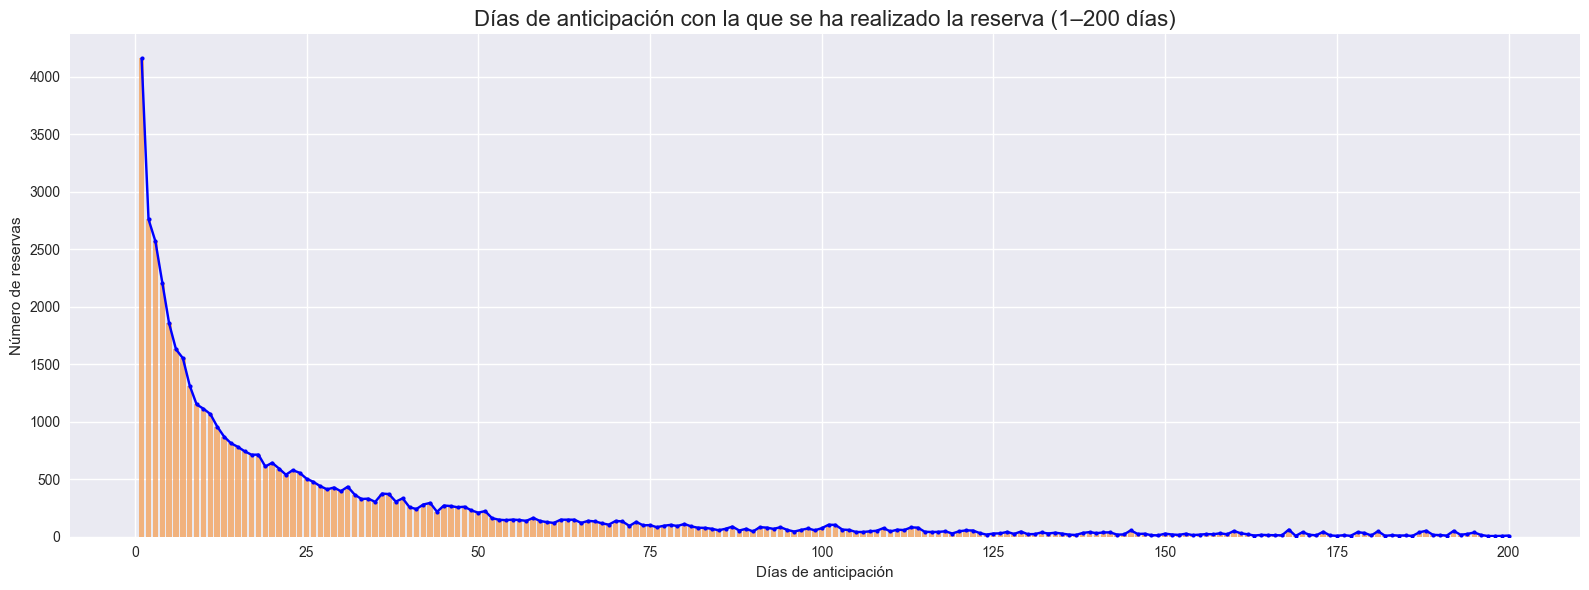

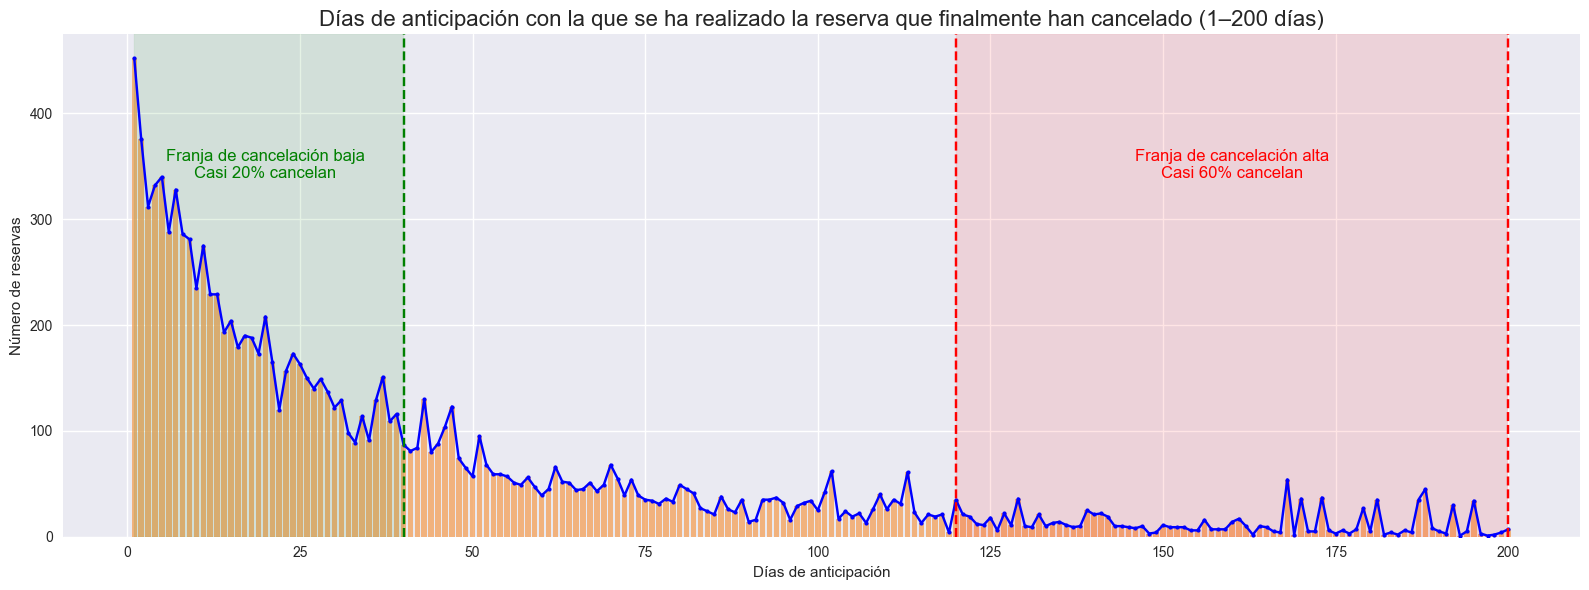

In [48]:
# --- FILTRO: solo de 1 a 200 días ---
df = df[(df["lead_time"] > 0) & (df["lead_time"] <= 200)]

# Asegurar orden ascendente
df = df.sort_values("lead_time")

# Contar reservas por día
reservas = df.groupby("lead_time").size()

# Contar cancelaciones por día
cancelaciones = df[df["is_cancelled"] == 1].groupby("lead_time").size()

# Rellenar días sin valores
cancelaciones = cancelaciones.reindex(reservas.index, fill_value=0)

# ---------------------------------------------------------
# FIGURA 1 — Todas las reservas por días de anticipación
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(reservas.index, reservas.values, color="sandybrown", alpha=0.8)
ax.plot(reservas.index, reservas.values, color="blue", marker="o", markersize=3)

ax.set_title("Días de anticipación con la que se ha realizado la reserva (1–200 días)", fontsize=16)
ax.set_xlabel("Días de anticipación")
ax.set_ylabel("Número de reservas")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# FIGURA 2 — Cancelaciones por días de anticipación
# ---------------------------------------------------------
fig, ax = plt.subplots(figsize=(16,6))

ax.bar(cancelaciones.index, cancelaciones.values, color="sandybrown", alpha=0.8)
ax.plot(cancelaciones.index, cancelaciones.values, color="blue", marker="o", markersize=3)

ax.set_title("Días de anticipación con la que se ha realizado la reserva que finalmente han cancelado (1–200 días)", fontsize=16)
ax.set_xlabel("Días de anticipación")
ax.set_ylabel("Número de reservas")

# --- Franjas de cancelación ---
# Franja alta: 200–120 días
ax.axvspan(200, 120, color="red", alpha=0.1)
ax.axvline(200, color="red", linestyle="--")
ax.axvline(120, color="red", linestyle="--")
ax.text(160, max(cancelaciones)*0.75,
        "Franja de cancelación alta\nCasi 60% cancelan",
        color="red", fontsize=12, ha="center")

# Franja baja: 40–1 días
ax.axvspan(40, 1, color="green", alpha=0.1)
ax.axvline(40, color="green", linestyle="--")
ax.text(20, max(cancelaciones)*0.75,
        "Franja de cancelación baja\nCasi 20% cancelan",
        color="green", fontsize=12, ha="center")

plt.tight_layout()
plt.show()